# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Reload Clean Data

In [2]:
df = pd.read_csv('Data/strokedata.csv')
print(df.info())
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None




,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Multivariate Visuals

Explore relationships between variables and differences in groups!

## Identifying Correlations

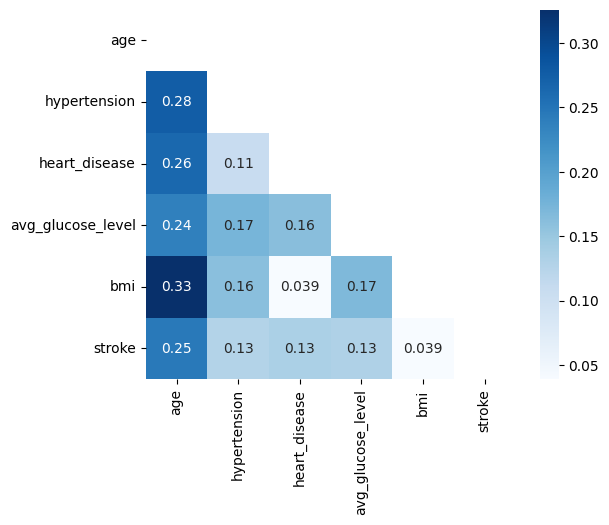

In [3]:
## heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Blues', annot=True, mask=mask);

As we can see that the correlations between features and target(stroke) and between each feature are all weak. 

we can tell from this correlation result that there is no one specific factor that plays a crucial role on causing the stroke. 

## Checking only stroke(1) Contribution in Each feature and Comparing

In [13]:
# slicing out the dataset with only stroke.
df_stroke = df.loc[df['stroke']==1]
len(df_stroke)

249

In [14]:
gender = df_stroke['gender'].value_counts()
married = df_stroke['ever_married'].value_counts()
work = df_stroke['work_type'].value_counts()
residence = df_stroke['Residence_type'].value_counts()
smoking = df_stroke['smoking_status'].value_counts()

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

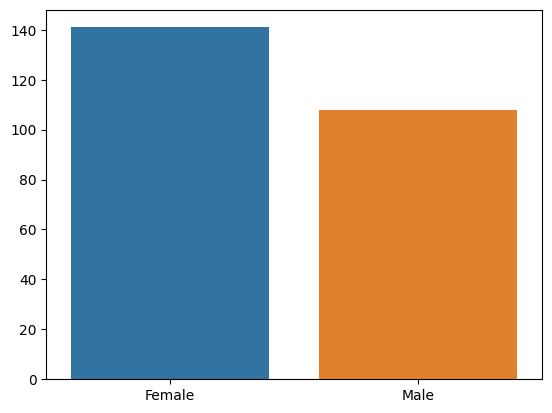

In [6]:

sns.barplot(gender.index, gender.values)

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

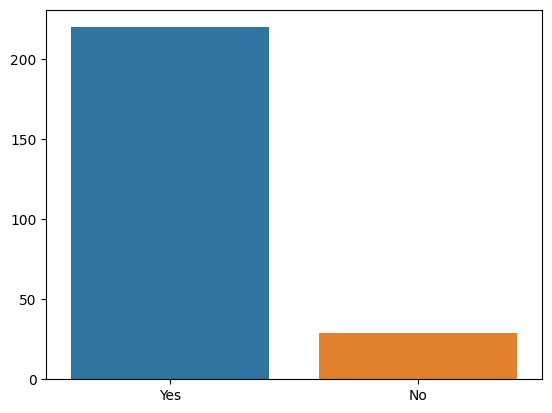

In [7]:
sns.barplot(married.index, married.values)

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

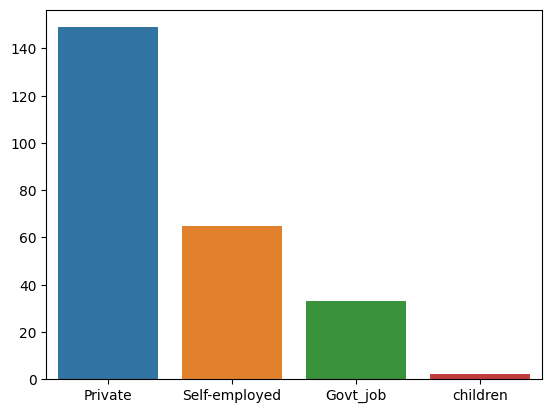

In [8]:
sns.barplot(work.index, work.values)

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

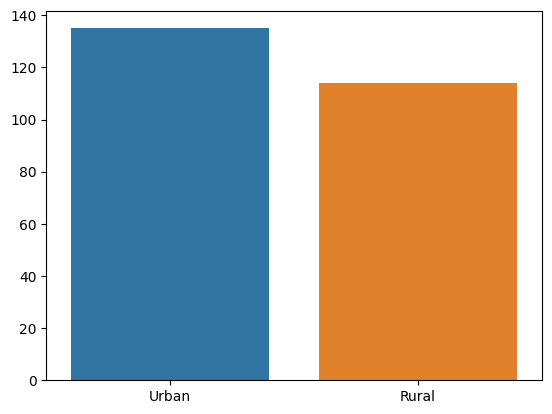

In [9]:
sns.barplot(residence.index, residence.values)

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

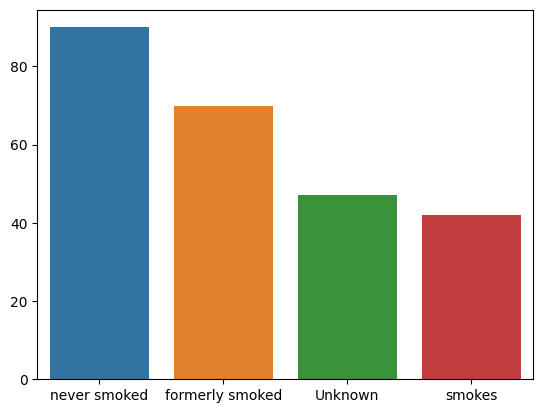

In [10]:
sns.barplot(smoking.index, smoking.values)

In [69]:
def stroke_group(x, y, z):
    fig, ax = plt.subplots(figsize=(4, 3), subplot_kw=dict(aspect="equal"))

    groups = [x, y]
    

    data = [float(x.split()[0]) for x in groups]
    group = [x.split()[-1] for x in groups]



    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

    ax.legend(wedges, groups,
          title="Stroke Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(f"Number of {z} in Each Stroke Group")

    plt.tight_layout()
    
    return fig,ax

In [70]:
df_hypertension = df.loc[df['hypertension']==1]
stroke = df_hypertension['stroke'].value_counts()
stroke

0    432
1     66
Name: stroke, dtype: int64

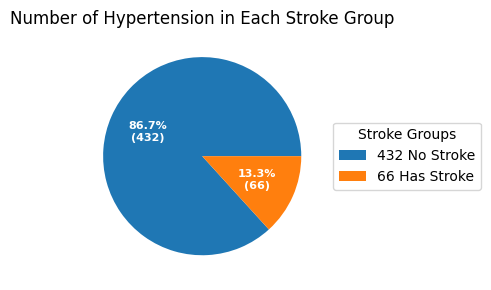

In [71]:
hypertension_fig, ax = stroke_group('432 No Stroke', '66 Has Stroke', 'Hypertension')

In [72]:
df_nonhypertension = df.loc[df['hypertension']==0]
stroke = df_nonhypertension['stroke'].value_counts()
stroke

0    4429
1     183
Name: stroke, dtype: int64

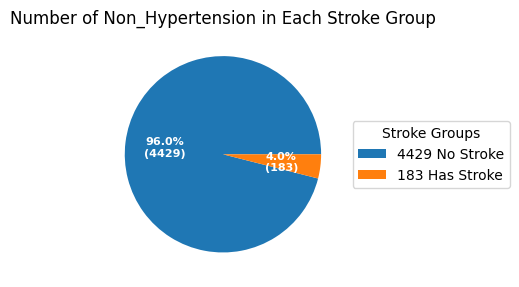

In [73]:
nonhypertension_fig, ax = stroke_group('4429 No Stroke', '183 Has Stroke', 'Non_Hypertension')

In [74]:
df_heart = df.loc[df['heart_disease']==0]
stroke = df_heart['stroke'].value_counts()
stroke

0    4632
1     202
Name: stroke, dtype: int64

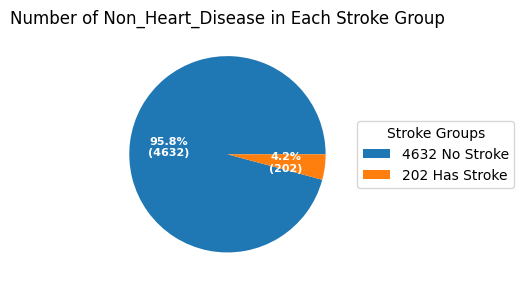

In [75]:
heart_fig, ax = stroke_group('4632 No Stroke', '202 Has Stroke', 'Non_Heart_Disease')

In [76]:
df_nonheart = df.loc[df['heart_disease']==1]
stroke = df_nonheart['stroke'].value_counts()
stroke

0    229
1     47
Name: stroke, dtype: int64

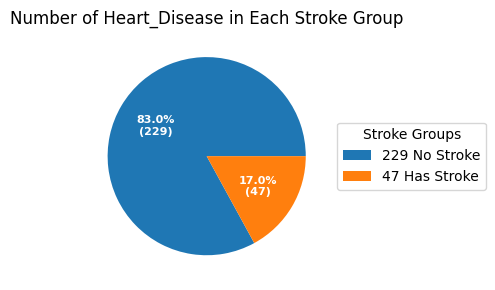

In [77]:
nonheart_fig, ax = stroke_group('229 No Stroke', '47 Has Stroke', 'Heart_Disease')

In [68]:
df_male = df.loc[df['gender']=='Male']
stroke = df_male['stroke'].value_counts()
stroke

0    2007
1     108
Name: stroke, dtype: int64

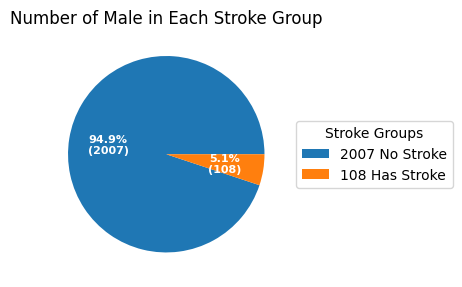

In [78]:
male_fig, ax = stroke_group('2007 No Stroke', '108 Has Stroke', 'Male')

In [79]:
df_male = df.loc[df['gender']=='Female']
stroke = df_male['stroke'].value_counts()
stroke

0    2853
1     141
Name: stroke, dtype: int64

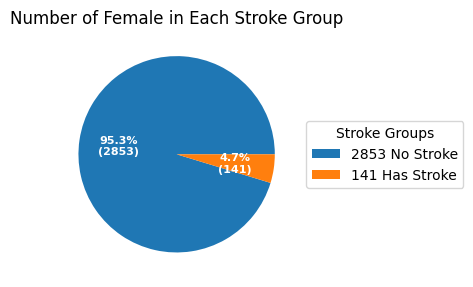

In [81]:
female_fig, ax = stroke_group('2853 No Stroke', '141 Has Stroke', 'Female')